In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
import os
import re
from os import listdir
from os.path import isfile, join

subsections (I'm using zerod by default):
[('zerod', 'O'), ('z0dinput', 'O'), ('profil0d', 'O'), ('simout', 'O'), ('z0dstruct_inter', 'O'), ('info_test_metis', 'O')]
indexes in subsection zerod:
[('dw', 'O'), ('dpfus', 'O'), ('dini', 'O'), ('diboot', 'O'), ('nwm', 'O'), ('xpoint', 'O'), ('sp', 'O'), ('vp', 'O'), ('sext', 'O'), ('peri', 'O'), ('meff', 'O'), ('pfus', 'O'), ('ifus', 'O'), ('xfus', 'O'), ('jxfus', 'O'), ('j0fus', 'O'), ('salpha', 'O'), ('RR', 'O'), ('pohm', 'O'), ('iohm', 'O'), ('vloop', 'O'), ('pbrem', 'O'), ('prad', 'O'), ('pradsol', 'O'), ('pcyclo', 'O'), ('zeff', 'O'), ('zeffsc', 'O'), ('ip', 'O'), ('ifwcd', 'O'), ('ieccd', 'O'), ('inbicd', 'O'), ('iboot', 'O'), ('asser', 'O'), ('ane', 'O'), ('nem', 'O'), ('nim', 'O'), ('nebord', 'O'), ('nDm', 'O'), ('n1m', 'O'), ('nhem', 'O'), ('nbar', 'O'), ('qa', 'O'), ('q95', 'O'), ('qmin', 'O'), ('q0', 'O'), ('ate', 'O'), ('tem', 'O'), ('te0', 'O'), ('tebord', 'O'), ('tite', 'O'), ('betap', 'O'), ('betaptot', 'O'), ('piqj', 'O'), 

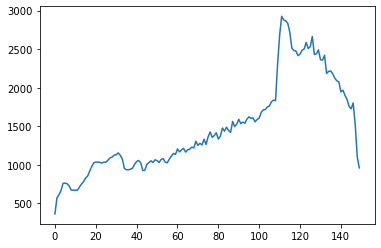

In [2]:
full_dataset = scipy.io.loadmat("../data/defaultjet_NBI_0.mat")


def list_subsections():
    print("subsections (I'm using zerod by default):")
    print(full_dataset['post'].dtype)

def list_indexes(subsection='zerod'):
    print("indexes in subsection " + subsection + ":")
    print(full_dataset['post']['zerod'][0][0].dtype)

def get_variable(index, subsection='zerod'):
    a = full_dataset['post'][subsection][0][0][index][0][0]
    a = [float(x[0]) for x in a]
    return a
def get_average(start, end, index, subsection='zerod'):
    a = get_variable(index, subsection=subsection)
    return (np.mean(a[start:end]), np.std(a[start:end]))

list_subsections()
list_indexes()
print(get_average(50, 100, 'te0'))
plt.plot(get_variable('te0'))
plt.show()

In [54]:
NBI_data_path = os.path.dirname(os.path.abspath("__file__")) + "/../data/NBI/"
NBI_data_files = [f for f in os.listdir(NBI_data_path) if os.path.isfile(os.path.join(NBI_data_path, f))]
try:
    NBI_data_files.remove('defaultjet_0.mat') # This is the sames as the nbi 15 file
    NBI_data_files.remove("defaultjet.mat") # This is the sames as the nbi 15 file
except:
    pass
NBI_data_files.sort()
NBI_data_files

['defaultjet_NBI_0.mat',
 'defaultjet_NBI_10.mat',
 'defaultjet_NBI_15.mat',
 'defaultjet_NBI_2.mat',
 'defaultjet_NBI_20.mat',
 'defaultjet_NBI_23.mat',
 'defaultjet_NBI_30.mat',
 'defaultjet_NBI_35.mat',
 'defaultjet_NBI_4.mat',
 'defaultjet_NBI_40.mat',
 'defaultjet_NBI_6.mat',
 'defaultjet_NBI_8.mat']

In [4]:
def get_variable_data(variable, file_name, subsection='zerod'):
    full_dataset = scipy.io.loadmat("../data/{}".format(file_name))
    data = full_dataset['post'][subsection][0][0][variable][0][0]
    return data

In [5]:
def get_nbi_from_file(file_name):
    nbi_pattern = "NBI_(.*?)\.mat"
    nbi_string = re.search(nbi_pattern, file_name).group(1)
    nbi_value = nbi_string + "MW"
    return nbi_value

In [58]:
def plot_variable_vs_nbi(variable, ylabel, xlabel="Time [Normalised]"):
    title = "NBI power values vs {}".format(variable)
    fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    for file in NBI_data_files:
        nbi_value = get_nbi_from_file(file)
        # variable = "te0"
        data = get_variable_data(variable, "NBI/{}".format(file))
        plt.plot(data, label=nbi_value)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="best")

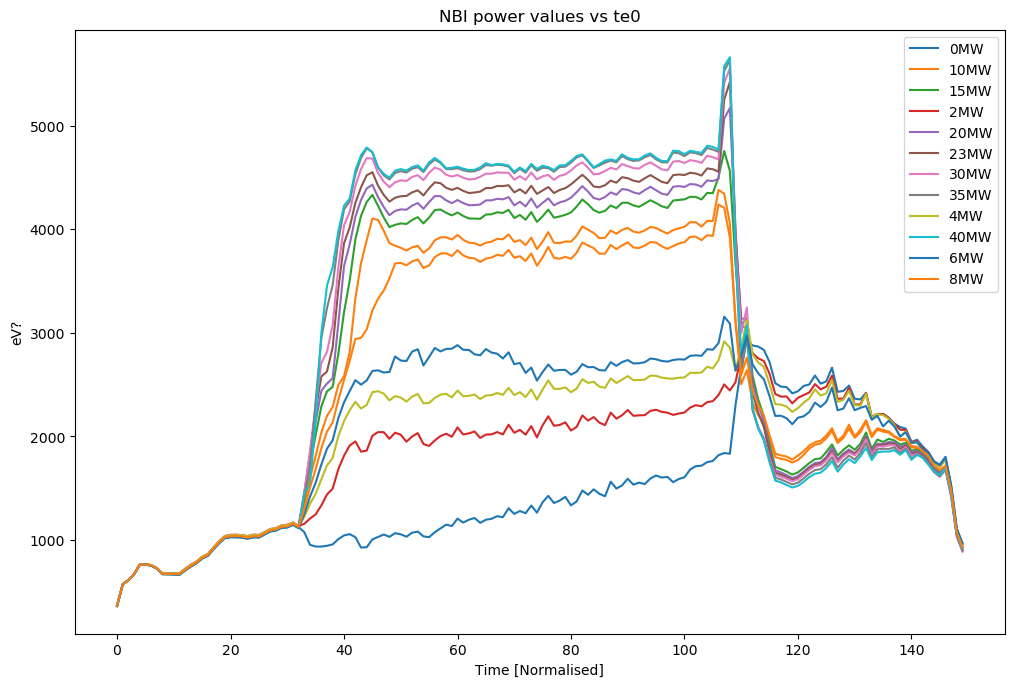

In [59]:
plot_variable_vs_nbi("te0", "eV?")

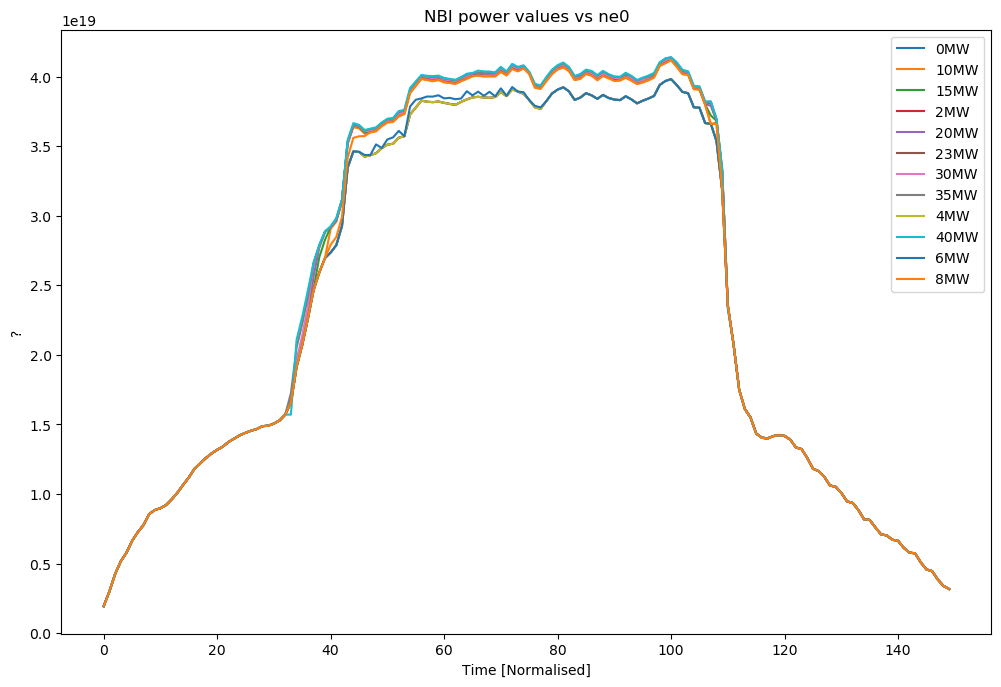

In [60]:
plot_variable_vs_nbi("ne0", "?")

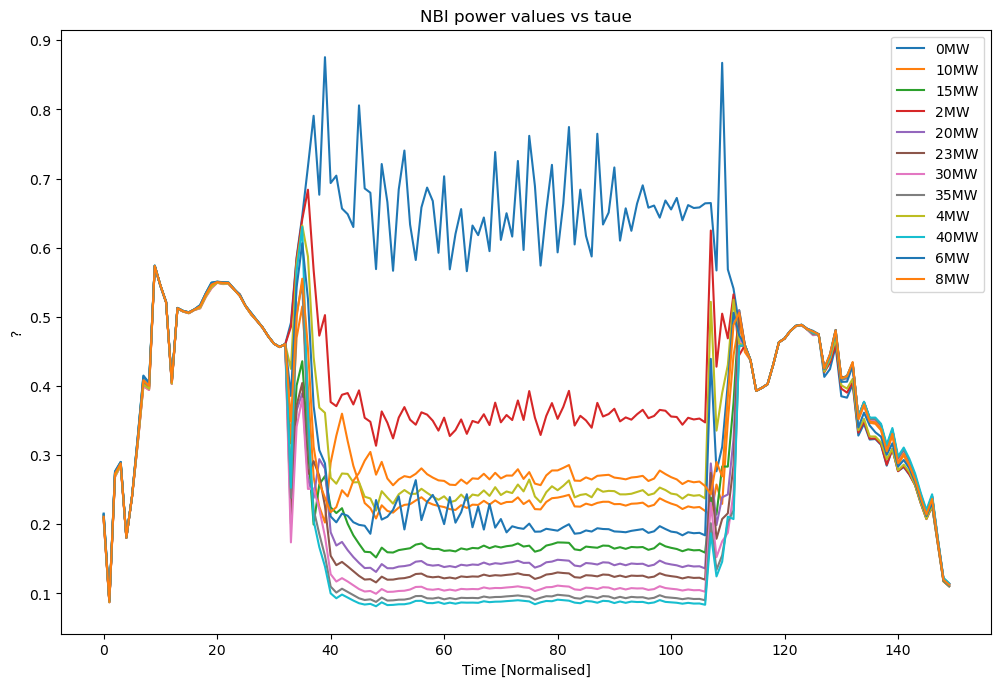

In [61]:
plot_variable_vs_nbi("taue", "?")

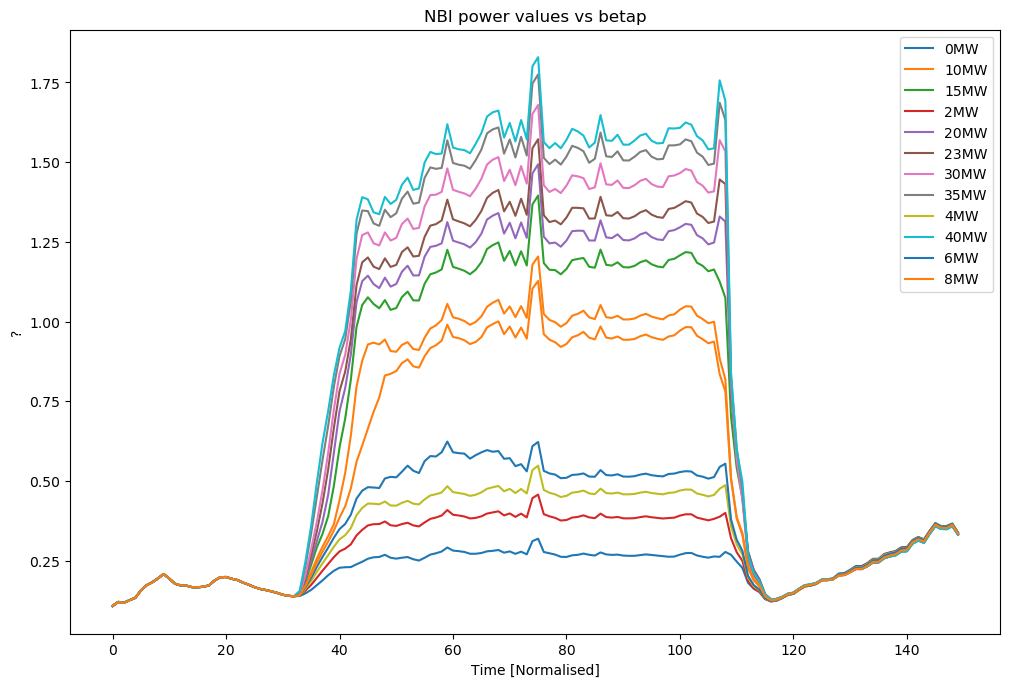

In [62]:
plot_variable_vs_nbi("betap", "?")

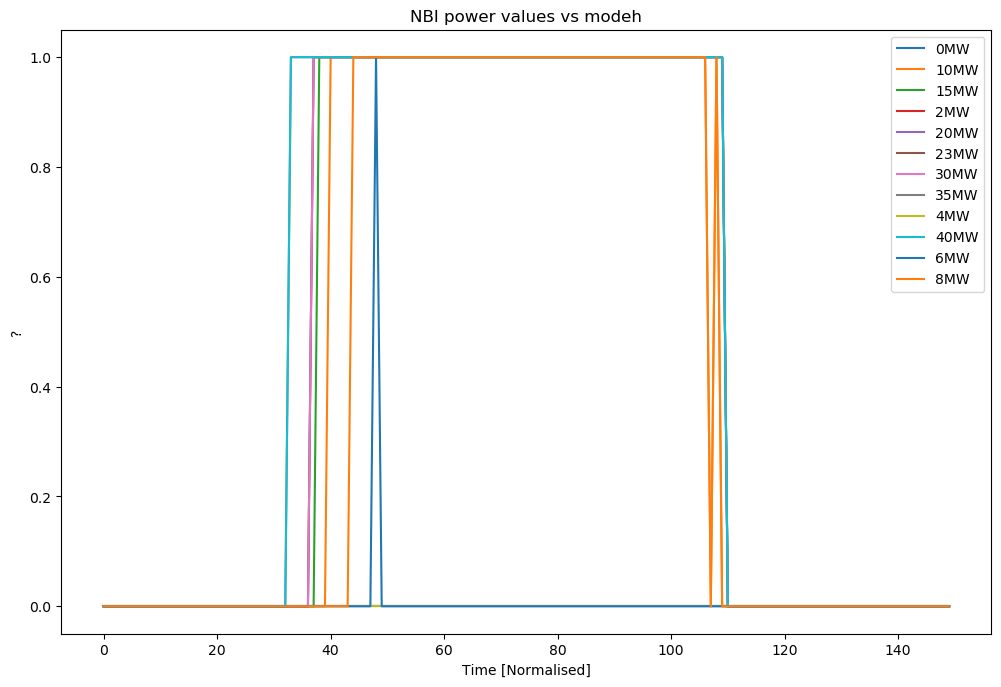

In [63]:
plot_variable_vs_nbi("modeh", "?")

After plotting the electron temperature, number density, confinement time, and beta with respect to NBI, we can see several things. The first one is that there's a clearly a threshold that, once it is passed, the plasma gets into H-mode. We can see more clearly when the plasma is in H-mode with the modeh plot. The magnitude of how different the values are depending on wether the plasma is or isn't in H-mode differs in the different parameters. For example, the number density doesn't vary that much, but if we see the comparison in the electron temperature or in beta, we can see that the values change much more.

We know that taue = stored energy / power loss. So, more than a time measurement, it is the inverse rate at which energy is lost. Looking at it in this way makes more sense. However, it is strange that the confinement time goes down when the NBI power is increased, but when we think about it, it makes sense because with more power, the temperature rises significantly. If the temperature rises, but we are still applying the same magnetic field, the magnetic field won't be able to confine the plasma that effectively, so the confinement time will decrease when the NBI power is increased.

Triple product calculation (Density, temperature, and confinement time)

In [72]:
def get_triple_product(file, file_folder):
    te0 = get_variable_data("te0", "{}/{}".format(file_folder, file))
    ne0 = get_variable_data("ne0", "{}/{}".format(file_folder, file))
    taue = get_variable_data("taue", "{}/{}".format(file_folder, file))
    # print (te0)
    # print (ne0)
    # print (taue)
    triple_product = te0 * ne0 * taue
    all_data = np.stack([te0, ne0, taue, triple_product], axis=1)
    return all_data

Text(0.5, 1.0, 'Triple product as a function of NBI')

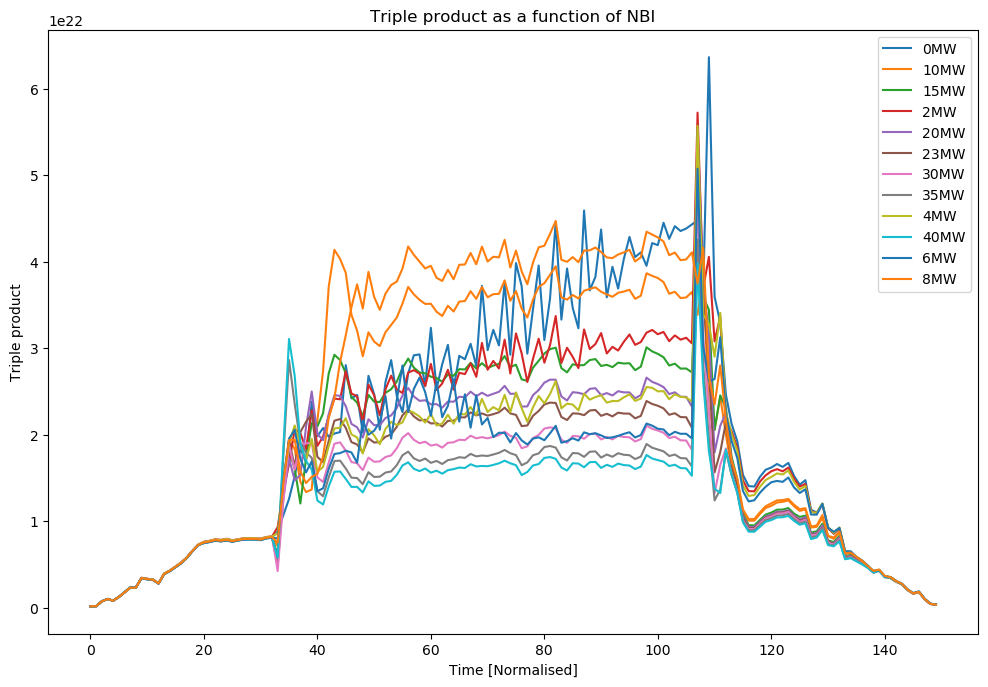

In [73]:
fig = plt.figure(figsize=(12,8), dpi=100, facecolor="w", edgecolor="k")
for file in NBI_data_files:
    nbi_value = get_nbi_from_file(file)
    tp_array = get_triple_product(file, "NBI")
    tp = tp_array[:, -1]
    plt.plot(tp, label=nbi_value)
plt.xlabel("Time [Normalised]")
plt.ylabel("Triple product")
plt.legend(loc="best")
plt.title("Triple product as a function of NBI")

The triple product decreases with NBI power. The 0 MW looks like it increases with time.

Varying nbar, B0, and Ip

To get an idea on how the average density, nbar, the toroidal magnetic field, B0, and the plasma current, Ip, I'll plot how the triple product varies with NBI=15MW, and using half and double the values that I initially had for nbar, B0, and Ip.

In [78]:
B0_Ip_nbar_data_path = os.path.dirname(os.path.abspath("__file__")) + "/../data/B0_Ip_nbar/"
B0_Ip_nbar_data_files = [f for f in os.listdir(B0_Ip_nbar_data_path) if os.path.isfile(os.path.join(B0_Ip_nbar_data_path, f))]
try:
    B0_Ip_nbar_data_files.remove('defaultjet_0.mat') # This is the sames as the nbi 15 file
    B0_Ip_nbar_data_files.remove("defaultjet.mat") # This is the sames as the nbi 15 file
except:
    pass
B0_Ip_nbar_data_files.sort()
B0_Ip_nbar_data_files

['defaultjet_B0_0.5.mat',
 'defaultjet_B0_2.mat',
 'defaultjet_Ip_0.5.mat',
 'defaultjet_Ip_2.mat',
 'defaultjet_nbar_0.5.mat',
 'defaultjet_nbar_2.mat',
 'defaultjet_original.mat']

In [79]:
def get_value_from_file(file_name):
    value_pattern = "defaultjet_(.*?)\.mat"
    value_string = re.search(value_pattern, file_name).group(1)
    return value_string

Text(0.5, 1.0, 'Triple product of NBI=15MW')

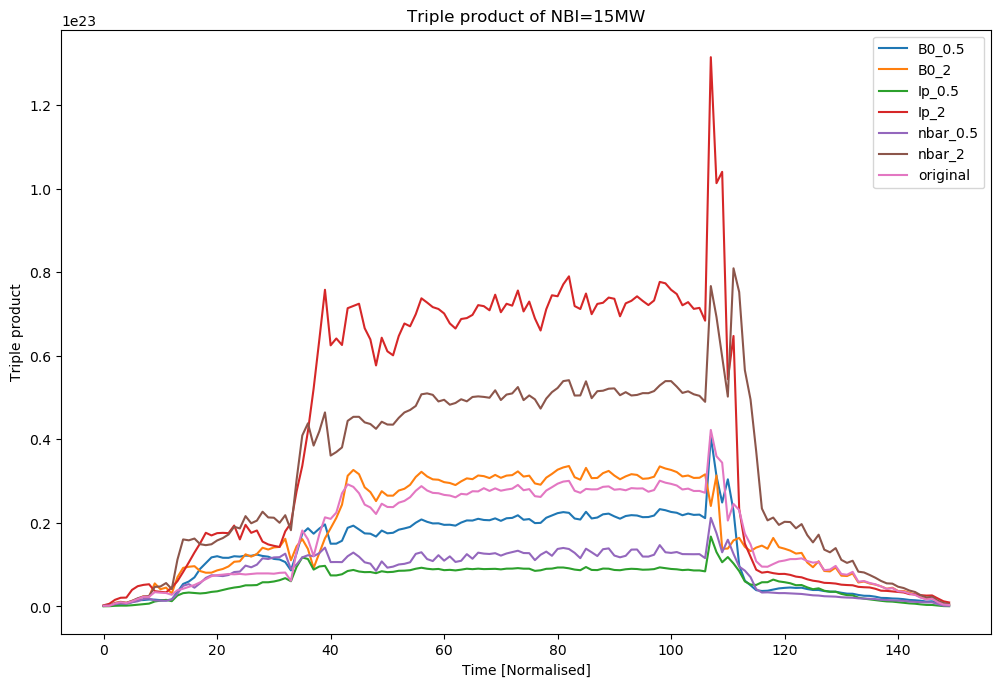

In [80]:
fig = plt.figure(figsize=(12,8), dpi=100, facecolor="w", edgecolor="k")
for file in B0_Ip_nbar_data_files:
    nbi_value = get_value_from_file(file)
    tp_array = get_triple_product(file, "B0_Ip_nbar")
    tp = tp_array[:, -1]
    plt.plot(tp, label=nbi_value)
plt.xlabel("Time [Normalised]")
plt.ylabel("Triple product")
plt.legend(loc="best")
plt.title("Triple product of NBI=15MW")

Looks like the plasma current, Ip, is the parameter that influences the triple product the most. When doubling the plasma current, we can see that the triple product is more than doubled from the original value. When the plasma current is halved, the triple product decreases drastically. After the plasma current, the parameter that influences the most is the average density. Finally, the toroidal field is the parameter that influences the triple proudct the least, out of these 3 parameters.